In [1]:
#load necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data into dfs
finch_1975 = pd.read_csv('finch_beaks_1975.csv')
finch_1975.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


In [3]:
finch_2012 = pd.read_csv('finch_beaks_2012.csv')
finch_2012.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [4]:
fortis_heredity = pd.read_csv('fortis_beak_depth_heredity.csv')
fortis_heredity.head()

,Mid-offspr,Male BD,Female BD
0,10.70,10.90,9.3
1,9.78,10.70,8.4
2,9.48,10.70,8.1
3,9.60,10.70,9.8
4,10.27,9.85,10.4


In [5]:
scandens_heredity = pd.read_csv('scandens_beak_depth_heredity.csv')
scandens_heredity.head()

,mid_parent,mid_offspring
0,8.3318,8.4190
1,8.4035,9.2468
2,8.5317,8.1532
3,8.7202,8.0089
4,8.7089,8.2215


In [6]:
# Combine 1975 and 2012 dfs

# Add a year column
finch_1975['year'] = '1975'
finch_2012['year'] = '2012'

# Change column names so they match
finch_2012.rename(columns={'blength': 'Beak length', 'bdepth': 'Beak depth'}, inplace=True)
finch_1975.rename(columns={'Beak length, mm': 'Beak length', 'Beak depth, mm': 'Beak depth'}, inplace=True)

# Combine dfs
finches = pd.concat([finch_1975, finch_2012])
finch_1975.head()

,band,species,Beak length,Beak depth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


In [7]:
# Are there any NaN values?
finches.isnull().sum()

band           0
species        0
Beak length    0
Beak depth     0
year           0
dtype: int64

In [8]:
mask = finches['species'] == 'fortis'
finch_fortis = finches[mask]
finch_scandens = finches[~mask]
finch_fortis.head()

,band,species,Beak length,Beak depth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1975 v.s. 2012: t-test independent samples with Bonferroni correction, P_val=5.302e-01 stat=6.282e-01


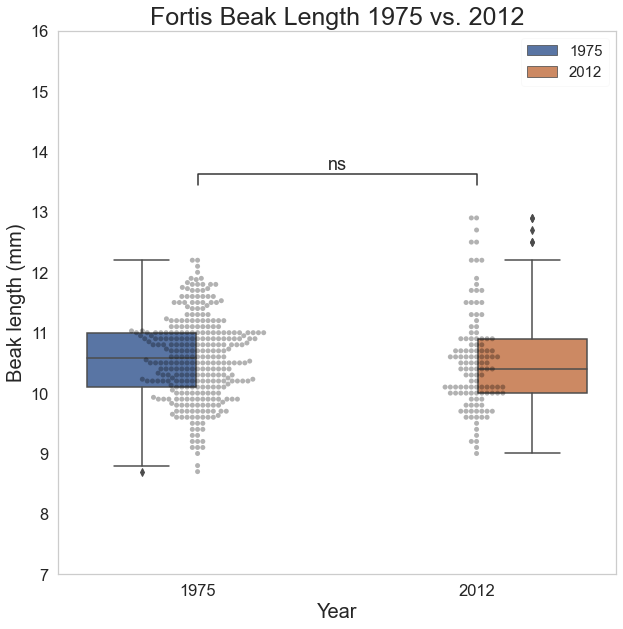

In [9]:
from statannot import add_stat_annotation

plt.figure(figsize=(10,10))
sns.set(style="whitegrid", font_scale = 1.5)
ax = sns.boxplot(x='year', y='Beak length', hue='year', data=finch_fortis)
ax.set(ylim=(7, 16))
sns.swarmplot(x='year', y='Beak length', color='black', alpha = 0.3, data=finch_fortis)
add_stat_annotation(ax, data=finch_fortis, x='year', y='Beak length', order=['1975', '2012'],
                    box_pairs=[('1975', '2012')],
                    test='t-test_ind', text_format='star', verbose=2)
plt.title('Fortis Beak Length 1975 vs. 2012', fontsize = 25)
plt.legend(fontsize=15, fancybox=True, framealpha=0.1)
plt.grid(False)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Beak length (mm)', fontsize = 20)
plt.savefig('Fortis Beak Length.png', transparent=True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1975 v.s. 2012: t-test independent samples with Bonferroni correction, P_val=2.727e-12 stat=7.196e+00


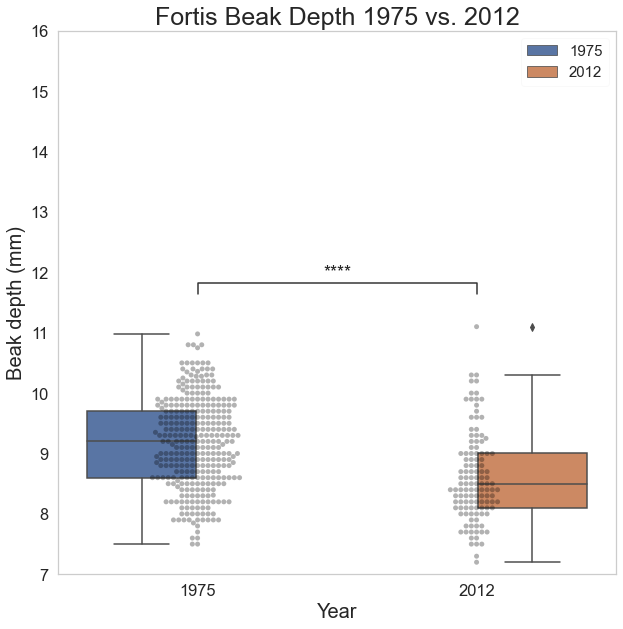

In [10]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", font_scale = 1.5)
ax = sns.boxplot(x='year', y='Beak depth', hue='year', data=finch_fortis)
ax.set(ylim=(7, 16))
sns.swarmplot(x='year', y='Beak depth', color='black', alpha = 0.3, data=finch_fortis)
add_stat_annotation(ax, data=finch_fortis, x='year', y='Beak depth', order=['1975', '2012'],
                    box_pairs=[('1975', '2012')],
                    test='t-test_ind', text_format='star', verbose=2)
plt.title('Fortis Beak Depth 1975 vs. 2012', fontsize = 25)
plt.legend(fontsize=15, fancybox=True, framealpha=0.1)
plt.grid(False)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Beak depth (mm)', fontsize = 20)
plt.savefig('Fortis Beak Depth.png', transparent=True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1975 v.s. 2012: t-test independent samples with Bonferroni correction, P_val=8.027e-11 stat=6.847e+00


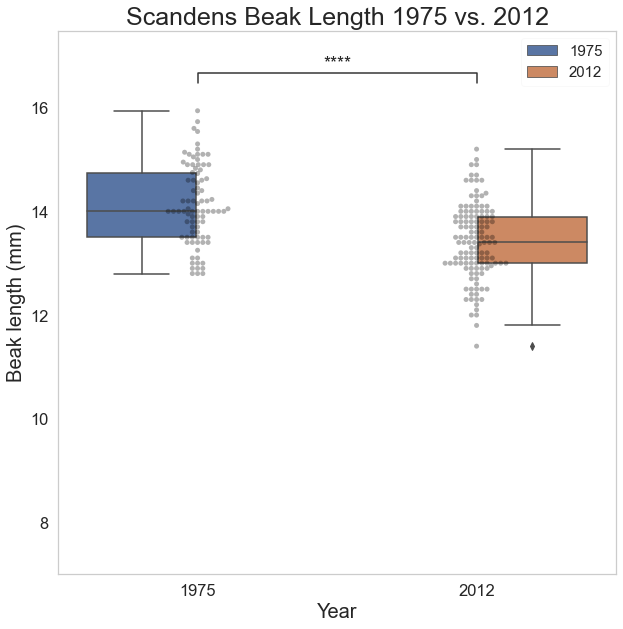

In [11]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", font_scale = 1.5)
ax = sns.boxplot(x='year', y='Beak length', hue='year', data=finch_scandens)
ax.set(ylim=(7, 16))
sns.swarmplot(x='year', y='Beak length', color='black', alpha = 0.3, data=finch_scandens)
add_stat_annotation(ax, data=finch_scandens, x='year', y='Beak length', order=['1975', '2012'],
                    box_pairs=[('1975', '2012')],
                    test='t-test_ind', text_format='star', verbose=2)
plt.title('Scandens Beak Length 1975 vs. 2012', fontsize = 25)
plt.legend(fontsize=15, fancybox=True, framealpha=0.1)
plt.grid(False)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Beak length (mm)', fontsize = 20)
plt.savefig('Scandens Beak Length.png', transparent=True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1975 v.s. 2012: t-test independent samples with Bonferroni correction, P_val=1.051e-02 stat=-2.582e+00


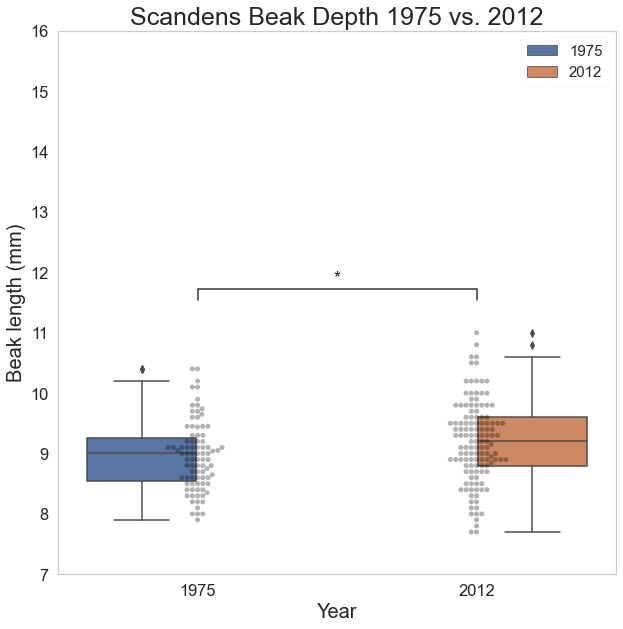

In [12]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", font_scale = 1.5)
ax = sns.boxplot(x='year', y='Beak depth', hue='year', data=finch_scandens)
ax.set(ylim=(7, 16))
sns.swarmplot(x='year', y='Beak depth', color='black', alpha = 0.3, data=finch_scandens)
add_stat_annotation(ax, data=finch_scandens, x='year', y='Beak depth', order=['1975', '2012'],
                    box_pairs=[('1975', '2012')],
                    test='t-test_ind', text_format='star', verbose=2)
plt.title('Scandens Beak Depth 1975 vs. 2012', fontsize = 25)
plt.legend(fontsize=15, fancybox=True, framealpha=0.1)
plt.grid(False)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Beak length (mm)', fontsize = 20)
plt.savefig('Scandens Beak Depth.png', transparent=True)

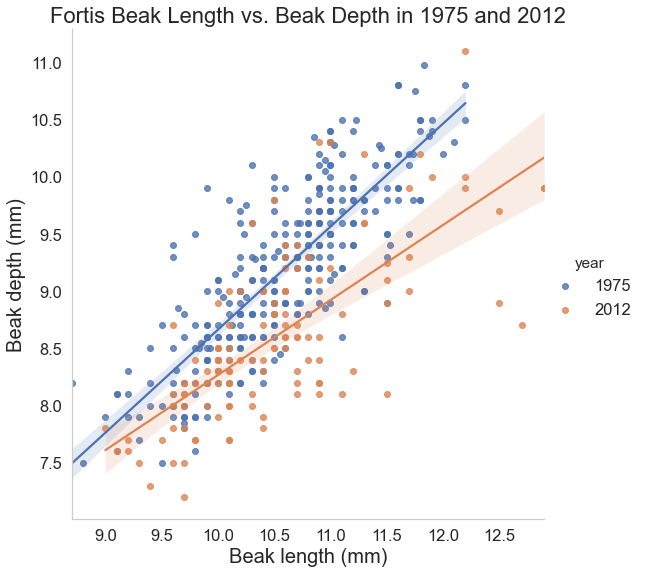

In [65]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(x='Beak length', 
           y='Beak depth', 
           hue='year',
           data=finch_fortis,
           height=8)
plt.title('Fortis Beak Length vs. Beak Depth in 1975 and 2012', fontsize = 22)

plt.xlabel("Beak length (mm)", fontsize = 20)
plt.ylabel("Beak depth (mm)", fontsize = 20)
plt.savefig('Fortis Beak Length vs Beak Depth.png', transparent=True, bbox_inches = "tight")

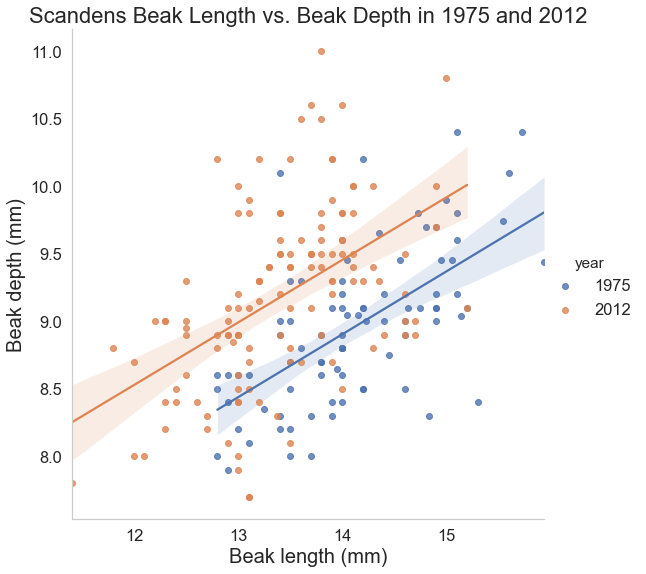

In [66]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(x='Beak length', 
           y='Beak depth', 
           hue='year',
           data=finch_scandens,
           height=8)
plt.title('Scandens Beak Length vs. Beak Depth in 1975 and 2012', fontsize = 22)

plt.xlabel("Beak length (mm)", fontsize = 20)
plt.ylabel("Beak depth (mm)", fontsize = 20)
plt.savefig('Scandens Beak Length vs Beak Depth.png', transparent=True, bbox_inches = "tight")

In [15]:
# perform t-test for each variable between individuals who survived and individuals who did not
from scipy import stats

mask = finch_1975['species'] == 'fortis'
fortis_1975 = finch_1975[mask].drop(['species', 'band', 'year'], axis=1)
scandens_1975 = finch_1975[~mask].drop(['species', 'band', 'year'], axis=1)

mask = finch_2012['species'] == 'fortis'
fortis_2012 = finch_2012[mask].drop(['species', 'band', 'year'], axis=1)
scandens_2012 = finch_2012[~mask].drop(['species', 'band', 'year'], axis=1)


In [16]:
mylist=[]
for column_type1, column_type2 in zip(fortis_1975, fortis_2012):
    ttest_values = (stats.ttest_ind(fortis_1975[column_type1], fortis_2012[column_type2], equal_var=False, nan_policy='omit'))
    mylist.append(ttest_values)

ttest_df = pd.DataFrame(mylist, index = fortis_1975.columns)
ttest_df.head()

,statistic,pvalue
Beak length,0.579123,5.632031e-01
Beak depth,7.217488,8.621932e-12


In [17]:
mylist2=[]
for column_type1, column_type2 in zip(scandens_1975, scandens_2012):
    ttest_values = (stats.ttest_ind(scandens_1975[column_type1], scandens_2012[column_type2], equal_var=False, nan_policy='omit'))
    mylist2.append(ttest_values)

ttest_df2 = pd.DataFrame(mylist2, index = scandens_1975.columns)
ttest_df2.head()

,statistic,pvalue
Beak length,6.786892,1.617178e-10
Beak depth,-2.662957,8.368169e-03


In [18]:
# Find the beak length: beak depth ratio for each species in each year

fortis_ratio_1975 = pd.DataFrame(fortis_1975['Beak length']/fortis_1975['Beak depth'])
fortis_ratio_2012 = pd.DataFrame(fortis_2012['Beak length']/fortis_2012['Beak depth'])
fortis_ratio_1975['year'] = '1975'
fortis_ratio_2012['year'] = '2012'
fortis_ratio = fortis_ratio_1975.append(fortis_ratio_2012)
fortis_ratio.columns.values[0] = 'ratio'
fortis_ratio.head()

,ratio,year
0,1.175000,1975
1,1.108434,1975
2,1.266667,1975
3,1.187500,1975
4,1.161616,1975


In [19]:
scandens_ratio_1975 = pd.DataFrame(scandens_1975['Beak length']/scandens_1975['Beak depth'])
scandens_ratio_2012 = pd.DataFrame(scandens_2012['Beak length']/scandens_2012['Beak depth'])
scandens_ratio_1975.reset_index(inplace=True, drop=True)
scandens_ratio_2012.reset_index(inplace=True, drop=True)

scandens_ratio_1975['year'] = '1975'
scandens_ratio_2012['year'] = '2012'
scandens_ratio = scandens_ratio_1975.append(scandens_ratio_2012)
scandens_ratio.columns.values[0] = 'ratio'

scandens_ratio.head()

,ratio,year
0,1.654762,1975
1,1.590909,1975
2,1.535714,1975
3,1.687500,1975
4,1.632911,1975


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1975 v.s. 2012: t-test independent samples with Bonferroni correction, P_val=7.761e-26 stat=-1.122e+01


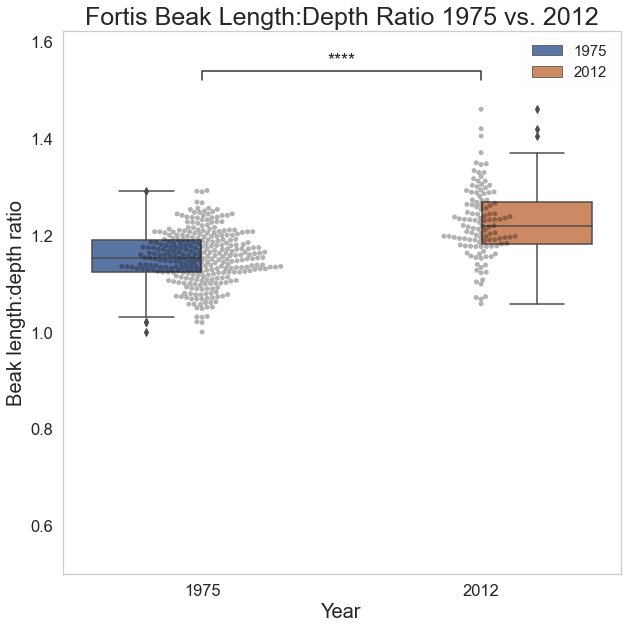

In [20]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", font_scale = 1.5)
ax = sns.boxplot(x='year', y='ratio', hue='year', data=fortis_ratio)
ax.set(ylim=(0.5, 1.5))
sns.swarmplot(x='year', y='ratio', color='black', alpha = 0.3, data=fortis_ratio)
add_stat_annotation(ax, data=fortis_ratio, x='year', y='ratio', order=['1975', '2012'],
                    box_pairs=[('1975', '2012')],
                    test='t-test_ind', text_format='star', verbose=2)
plt.title('Fortis Beak Length:Depth Ratio 1975 vs. 2012', fontsize = 25)
plt.legend(fontsize=15, fancybox=True, framealpha=0.1)
plt.grid(False)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Beak length:depth ratio', fontsize = 20)
plt.savefig('Fortis Beak Length Depth ratio.png', transparent=True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1975 v.s. 2012: t-test independent samples with Bonferroni correction, P_val=1.011e-16 stat=9.039e+00


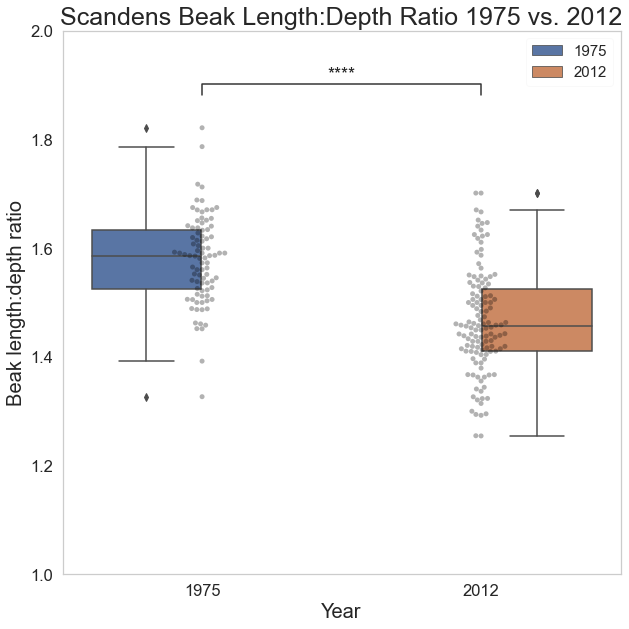

In [21]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", font_scale = 1.5)
ax = sns.boxplot(x='year', y='ratio', hue='year', data=scandens_ratio)
ax.set(ylim=(1, 2))
sns.swarmplot(x='year', y='ratio', color='black', alpha = 0.3, data=scandens_ratio)
add_stat_annotation(ax, data=scandens_ratio, x='year', y='ratio', order=['1975', '2012'],
                    box_pairs=[('1975', '2012')],
                    test='t-test_ind', text_format='star', verbose=2)
plt.title('Scandens Beak Length:Depth Ratio 1975 vs. 2012', fontsize = 25)
plt.legend(fontsize=15, fancybox=True, framealpha=0.1)
plt.grid(False)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Beak length:depth ratio', fontsize = 20)
plt.savefig('Scandens Beak Length Depth ratio.png', transparent=True)

### Are these traits heritable?

In [22]:
fortis_heredity.head()

,Mid-offspr,Male BD,Female BD
0,10.70,10.90,9.3
1,9.78,10.70,8.4
2,9.48,10.70,8.1
3,9.60,10.70,9.8
4,10.27,9.85,10.4


In [23]:
scandens_heredity.head()

,mid_parent,mid_offspring
0,8.3318,8.4190
1,8.4035,9.2468
2,8.5317,8.1532
3,8.7202,8.0089
4,8.7089,8.2215


In [24]:
# Calculate mid_parent for fortis
fortis_heredity['mid_parent'] = (fortis_heredity['Male BD'] + fortis_heredity['Female BD']) /2

In [25]:
fortis_heredity.rename(columns = {'Mid-offspr': 'mid_offspring'}, inplace=True)

fortis_heredity.head()

,mid_offspring,Male BD,Female BD,mid_parent
0,10.70,10.90,9.3,10.100
1,9.78,10.70,8.4,9.550
2,9.48,10.70,8.1,9.400
3,9.60,10.70,9.8,10.250
4,10.27,9.85,10.4,10.125


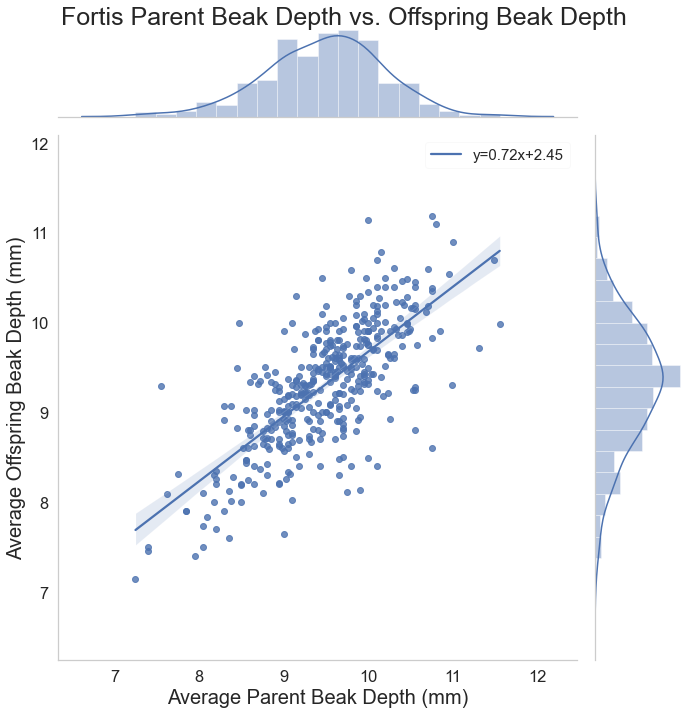

In [49]:
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(fortis_heredity['mid_parent'], fortis_heredity['mid_offspring'])

sns.jointplot(x='mid_parent', y='mid_offspring', data=fortis_heredity, kind='reg', height=10, 
              line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)})
plt.legend(fontsize=15, fancybox=True, framealpha=0.1)
plt.suptitle('Fortis Parent Beak Depth vs. Offspring Beak Depth', y = 1, fontsize = 25)

plt.xlabel("Average Parent Beak Depth (mm)", fontsize = 20)
plt.ylabel("Average Offspring Beak Depth (mm)", fontsize = 20)
plt.savefig('Fortis heredity.png', transparent=True)
plt.show()


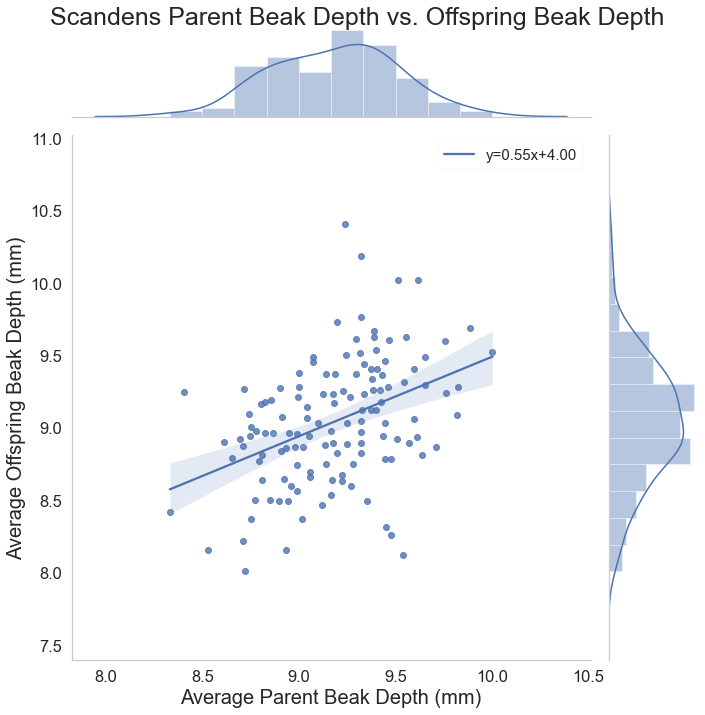

In [50]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(scandens_heredity['mid_parent'], scandens_heredity['mid_offspring'])

sns.jointplot(x='mid_parent', y='mid_offspring', data=scandens_heredity, kind='reg', height=10, 
              line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)})

plt.legend(fontsize=15, fancybox=True, framealpha=0.1)
plt.suptitle('Scandens Parent Beak Depth vs. Offspring Beak Depth', y = 1, fontsize = 25)
plt.xlabel("Average Parent Beak Depth (mm)", fontsize = 20)
plt.ylabel("Average Offspring Beak Depth (mm)", fontsize = 20)
plt.savefig('Scandens heredity.png', transparent=True)
plt.show()